## 점진적인 학습 이란

###### 훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라,
###### 시간 차를두고 수집이 되는 경우에는 훈련모델 학습은 언제 해야 할까?
###### 이런 문제를 해결하기 위해 수집될 떄마

In [1]:
import pandas as pd
import numpy as np

In [10]:
fish = pd.read_csv('./data/07_fish.csv')
print(len(fish))
fish.head()
# fish.isnull().sum()
# fish.info()

159


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## 2.데이터 전처리

In [23]:
### 독립변수와 종속변수 분리하여 변수화
# 독립변수명 : fish_input
# 종속변수명 : fish_target

## 분리시켜 주세요.. 


### 독립변수 인풋데이터 추출(2차원 배열 형태로)
fish_input = fish[['Weight', 'Length','Diagonal','Height','Width']].to_numpy()
print(fish_input.shape)

### 종속변수 타겟 데이터 추출(1차원 배열 형태로)
fish_target = fish['Species'].to_numpy()
print(fish_target.shape)


(159, 5)
(159,)


In [24]:

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input,fish_target,test_size = 0.25,random_state=42)
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(119, 5)
(40, 5)
(119,)
(40,)


In [25]:
### 정규화(표준화) -> 독립변수 표준점수로 동일하게 표준화(스케일)
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
ss = StandardScaler()

### 스스로 표준점수 생성
ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

### 샘플 5개 행 출력해 보기

## 확률적 경사 하강법을 이용한 분류

In [60]:
### 사용 클래스(모델) : SGDCLASSIFIER

from sklearn.linear_model import SGDClassifier

#클래스(모델) 생성
sc = SGDClassifier(loss='log', max_iter=100, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련데이터 정확도
print(sc.score(train_scaled, train_target))
### 테스트데이터 정확도
print(sc.score(test_scaled, test_target))

###(해석)
# -훈련모델의 학습능력이 다소 떨어집니다.

0.8403361344537815
0.8


In [52]:
### 점진적 학습 시작
# 새로운 데이터가 들어왔다고 가정..(실제로는 새로운 데이터 사용)
sc.partial_fit(train_scaled, train_target)

### 훈련데이터 정확도
print(sc.score(train_scaled, train_target))
### 테스트데이터 정확도
print(sc.score(test_scaled, test_target))


0.8151260504201681
0.85


### 에포크 반복 횟수 찾기

In [70]:
sc= SGDClassifier(loss ='log', random_state = 42)

train_score = []
test_score = []

# 범주 고유값
classes = np.unique(train_target)

# 반복을 300회 이상으로 테스트하여 정확도를 리스트에 저장
for _ in range(0, 300) :
    sc.partial_fit(train_scaled, train_target, classes = classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    print(train_score)


[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411, 0.7310924369747899, 0.8151260504201681, 0.7478991596638656, 0.8319327731092437, 0.8151260504201681, 0.8571428571428571, 0.8571428571428571, 0.8403361344537815, 0.865546218487395, 0.865546218487395, 0.865546218487395, 0.8739495798319328, 0.8739495798319328, 0.8739495798319328, 0.865546218487395, 0.865546218487395, 0.8823529411764706, 0.865546218487395, 0.8823529411764706, 0.8823529411764706, 0.8823529411764706, 0.8907563025210085, 0.8907563025210085, 0.8907563025210085, 0.8907563025210085, 0.8823529411764706, 0.8823529411764706, 0.8907563025210085, 0.907563025210084, 0.907563025210084, 0.8991596638655462, 0.907563025210084, 0.8991596638655462, 0.8991596638655462, 0.907563025210084, 0.907563025210084, 0.907563025210084, 0.9159663865546218, 0.9159663865546218, 0.9243697478991597, 0.9243697478991597, 0.9243697478991597, 0.9243697478991597, 0.924369747

In [57]:
print('훈련 정확도 리스트 갯수 = ',len(train_score))
print('테스트 정확도 리스트 갯수 = ',len(test_score))

훈련 정확도 리스트 갯수 =  300
테스트 정확도 리스트 갯수 =  300


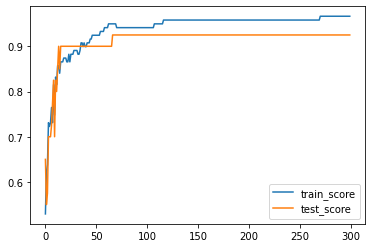

In [58]:
###  최적의 에포크 위치확인하기 : 시각화
import matplotlib.pyplot as plt

plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

### 훈련과 테스트 지점이 가장 가까운데에서 훈련데이터가 바뀌는 시점이 '정확도 리스트 갯수' 시점으로 알맞음

In [ ]:
### 사용 클래스(모델) : SGDCLASSIFIER

from sklearn.linear_model import SGDClassifier

#클래스(모델) 생성
## 컴퓨터가 혼자 멈추게 못하는 함수 tol = None,
sc = SGDClassifier(loss='log', max_iter=100, tol = None, random_state=42)

### 훈련모델 생성하기
sc.fit(train_scaled, train_target)

### 훈련데이터 정확도
print(sc.score(train_scaled, train_target))
### 테스트데이터 정확도
print(sc.score(test_scaled, test_target))

## 훈련하다가 컴퓨터가 적당한 위치를 찾으면 알아서 멈춰버림
## 우리가 생각한 적당한 값은 100번 대인데
## 컴퓨터는 30번대에서 끊음  (0.84)

## 모델 예측값 데이터프레임에 저장하기

In [ ]:
### [문제]
##### - 새로운 데이터가 수집되었다고 가정하고 예측을 통해 결과값 저장하기
# - 기존 FISH 데이터 전체를 신규데이터라고 가정하고 진행
# - 신규 데이터는 WEIGHT, LENGTH, DIAGONAL, HEIGHT, WIDTH
# (데이터프레임 변수는 별도로 만들어서 사용)

#### -  데이터프레임에 예측결과에 대한 SPECIES_PRED컬럼 추가

##### <출력 결과>
# - SPECIES PRED가 추가된 데이터프레임 출력
# (출력결과) 데이터프레임의 7개 컬럼 모두 출력
#  WEIGHT, LENGTH, DIAGONAL, HEIGHT, WIDTH, SPECIES, SPECIES_PRED

# - 정답을 맞춘 갯수와 틀린 갯수 출력하기
# (출력 예시) 총 갯수[159]건 중에, 정답 갯수[149]건, 오답 갯수[10]건

# - 정답률과 오답률 출력하기
# (출력 예시) 총 100.0% 중 정답률[93.71%], 오답률[6.29%]

In [74]:
predict_data = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

fish_target = fish['Species'].to_numpy()


[0.5294117647058824]
[0.5294117647058824, 0.6218487394957983]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411, 0.7310924369747899]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.7226890756302521, 0.7310924369747899, 0.7647058823529411, 0.7310924369747899, 0.8151260504201681]
[0.5294117647058824, 0.6218487394957983, 0.6386554621848739, 0.7310924369747899, 0.72268907